In [55]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import display as dp

In [56]:
carp = 'documents'
customer_rut = os.path.join(carp, 'customers.csv')
order_item_rut = os.path.join(carp, 'order_items.csv')
orders_rut = os.path.join(carp, 'orders.csv')
products_rut = os.path.join(carp, 'products.csv')


In [57]:
# Extraccion de documentos
customer = pd.read_csv(customer_rut)
order_item = pd.read_csv(order_item_rut)
orders = pd.read_csv(orders_rut)
products = pd.read_csv(products_rut)

In [58]:
products.head()

,product_id,category,product_name,cost_price,supplier
0,PROD1000,Electronics,Electronics_Product_0,51.13,Supplier_3
1,PROD1001,Electronics,Electronics_Product_1,66.94,Supplier_9
2,PROD1002,Electronics,Electronics_Product_2,21.71,Supplier_4
3,PROD1003,Electronics,Electronics_Product_3,27.54,Supplier_5
4,PROD1004,Electronics,Electronics_Product_4,21.99,Supplier_8


In [59]:
dp(customer.head())

,customer_id,name,email,signup_date,country
0,CUST0000,Customer_0,user0@example.com,2022-04-13,Colombia
1,CUST0001,Customer_1,user1@example.com,2023-03-12,Mexico
2,CUST0002,Customer_2,user2@example.com,2022-09-28,Mexico
3,CUST0003,Customer_3,user3@example.com,2022-04-17,Mexico
4,CUST0004,Customer_4,user4@example.com,2022-03-13,Colombia


In [60]:
dp(orders.head())

,order_id,customer_id,order_date,order_status,shipping_cost,payment_method,total_amount
0,ORD00000,CUST0176,2023-01-07,Cancelled,10.23,Bank Transfer,0.00
1,ORD00001,CUST0195,2023-05-25,Completed,4.00,PayPal,663.54
2,ORD00002,CUST0142,2023-07-30,Completed,4.97,Credit Card,51.19
3,ORD00003,CUST0078,2023-02-16,Completed,14.37,Credit Card,327.77
4,ORD00004,CUST0088,2023-04-22,Completed,11.59,Credit Card,398.77


In [61]:
# Filtrar los pedido completados

In [62]:
complete_orders= orders[orders['order_status'] == 'Completed']

In [63]:
# Unir con los orders Items
merge_item = pd.merge(order_item, complete_orders, on='order_id', how='inner')
dp(merge_item.head())

,order_id,product_id,category,product_name,quantity,unit_price,discount,customer_id,order_date,order_status,shipping_cost,payment_method,total_amount
0,ORD00001,PROD1238,Books,Books_Product_39,3,41.94,10,CUST0195,2023-05-25,Completed,4.00,PayPal,663.54
1,ORD00001,PROD1164,Toys,Toys_Product_2,3,121.19,5,CUST0195,2023-05-25,Completed,4.00,PayPal,663.54
2,ORD00001,PROD1235,Books,Books_Product_36,2,118.18,15,CUST0195,2023-05-25,Completed,4.00,PayPal,663.54
3,ORD00002,PROD1219,Books,Books_Product_20,2,27.19,15,CUST0142,2023-07-30,Completed,4.97,Credit Card,51.19
4,ORD00003,PROD1073,Clothing,Clothing_Product_23,1,70.06,5,CUST0078,2023-02-16,Completed,14.37,Credit Card,327.77


In [64]:
# Unir con los products

In [65]:
merge_products = pd.merge(merge_item, products[['product_id', 'cost_price']], on='product_id', how='left')

In [66]:
dp(merge_products.head())

,order_id,product_id,category,product_name,quantity,unit_price,discount,customer_id,order_date,order_status,shipping_cost,payment_method,total_amount,cost_price
0,ORD00001,PROD1238,Books,Books_Product_39,3,41.94,10,CUST0195,2023-05-25,Completed,4.00,PayPal,663.54,28.21
1,ORD00001,PROD1164,Toys,Toys_Product_2,3,121.19,5,CUST0195,2023-05-25,Completed,4.00,PayPal,663.54,98.79
2,ORD00001,PROD1235,Books,Books_Product_36,2,118.18,15,CUST0195,2023-05-25,Completed,4.00,PayPal,663.54,60.72
3,ORD00002,PROD1219,Books,Books_Product_20,2,27.19,15,CUST0142,2023-07-30,Completed,4.97,Credit Card,51.19,22.53
4,ORD00003,PROD1073,Clothing,Clothing_Product_23,1,70.06,5,CUST0078,2023-02-16,Completed,14.37,Credit Card,327.77,52.80


In [67]:
# CAlculo para sacar ingreso por grupo
merge_products['ingreso_bruto'] = merge_products['unit_price']*merge_products['quantity']
merge_products['descuento']= merge_products['unit_price']*merge_products['discount'] / 100 * merge_item['quantity']
merge_products['costo'] = merge_products['cost_price'] * merge_products['quantity']

In [68]:
dp(merge_products[['category', 'ingreso_bruto', 'descuento', 'costo', 'shipping_cost']])

,category,ingreso_bruto,descuento,costo,shipping_cost
0,Books,125.82,12.5820,84.63,4.00
1,Toys,363.57,18.1785,296.37,4.00
2,Books,236.36,35.4540,121.44,4.00
3,Books,54.38,8.1570,45.06,4.97
4,Clothing,70.06,3.5030,52.80,14.37
...,...,...,...,...,...
3210,Home,166.19,16.6190,83.14,7.40
3211,Toys,364.98,18.2490,299.04,7.40
3212,Electronics,287.31,0.0000,169.62,7.40
3213,Books,24.64,1.2320,17.65,10.35


In [69]:
# Resumen por categoria
resumen_categoria = merge_products.groupby('category').agg({
    'ingreso_bruto':'sum',
    'costo':'sum',
    'descuento':'sum',
    'shipping_cost':'sum'
})

In [70]:
dp(resumen_categoria)

,ingreso_bruto,costo,descuento,shipping_cost
category,,,,
Books,94874.19,59183.62,4498.6240,5768.04
Clothing,144331.85,89073.52,6937.8845,7066.00
Electronics,100475.05,63623.44,4391.0320,5624.34
Home,107704.97,66308.00,4836.3210,5582.88
Toys,84057.09,53371.92,3574.2415,3634.55


In [71]:
resumen_categoria['ingreso_neto'] = resumen_categoria['ingreso_bruto'] - resumen_categoria['costo'] - resumen_categoria['descuento'] - resumen_categoria['shipping_cost']
resumen_categoria['Formateado_incompleto'] = resumen_categoria['ingreso_neto'].map('{:.2f}'.format)

In [72]:
dp(resumen_categoria)

,ingreso_bruto,costo,descuento,shipping_cost,ingreso_neto,Formateado_incompleto
category,,,,,,
Books,94874.19,59183.62,4498.6240,5768.04,25423.9060,25423.91
Clothing,144331.85,89073.52,6937.8845,7066.00,41254.4455,41254.45
Electronics,100475.05,63623.44,4391.0320,5624.34,26836.2380,26836.24
Home,107704.97,66308.00,4836.3210,5582.88,30977.7690,30977.77
Toys,84057.09,53371.92,3574.2415,3634.55,23476.3785,23476.38


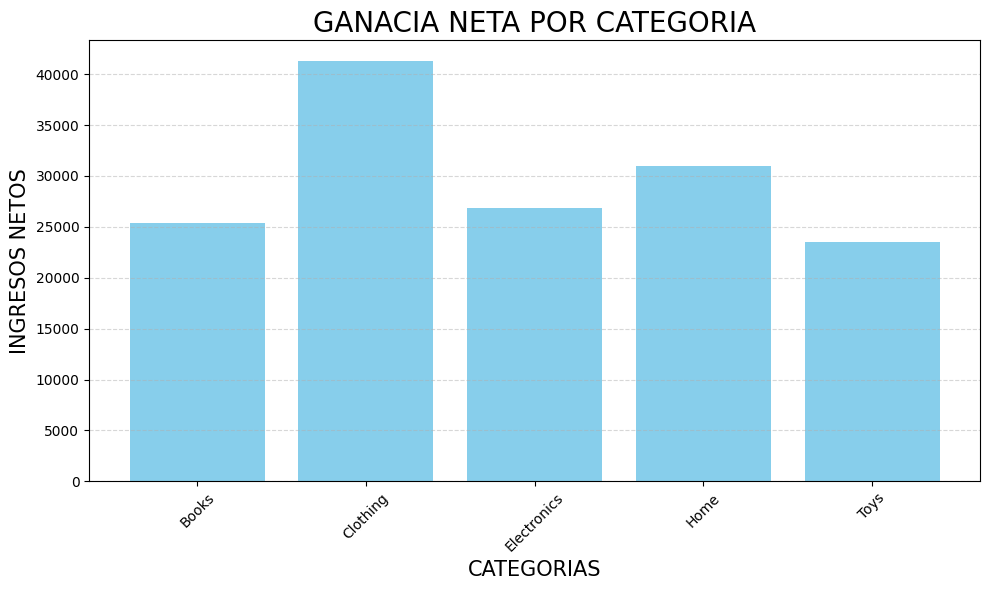

In [85]:
# Grafico todos mis valores con matplotlib
plt.figure(figsize=(10,6))
categorias = resumen_categoria.index.get_level_values('category')
plt.bar(categorias, resumen_categoria['ingreso_neto'], color='skyblue')
plt.xlabel('CATEGORIAS', size=15)
plt.ylabel('INGRESOS NETOS', size=15)
plt.title('GANACIA NETA POR CATEGORIA', size=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()